# Singapore education with weather condition 

Does weather effect Singapore education performance 
that why we focus on PISA score with rain data from Singapore

references:
- [cities average precipitation](https://en.wikipedia.org/wiki/List_of_cities_by_average_precipitation#)
- [sunshine duration](https://en.wikipedia.org/wiki/List_of_cities_by_sunshine_duration)

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
# import information about raining in Singapore
number_of_rain_df = pd.read_csv('data/rainfall-monthly-number-of-rain-days.csv')
total_rain_df = pd.read_csv('data/rainfall-monthly-total.csv')

In [77]:
# clean and prep `number_of_rain_df` data
number_of_rain_df = number_of_rain_df.dropna()
number_of_rain_df['date'] = pd.to_datetime(number_of_rain_df['month'].map(str) + '-01')
number_of_rain_df = number_of_rain_df.loc[(number_of_rain_df['date'] >= '2012-01-01')]

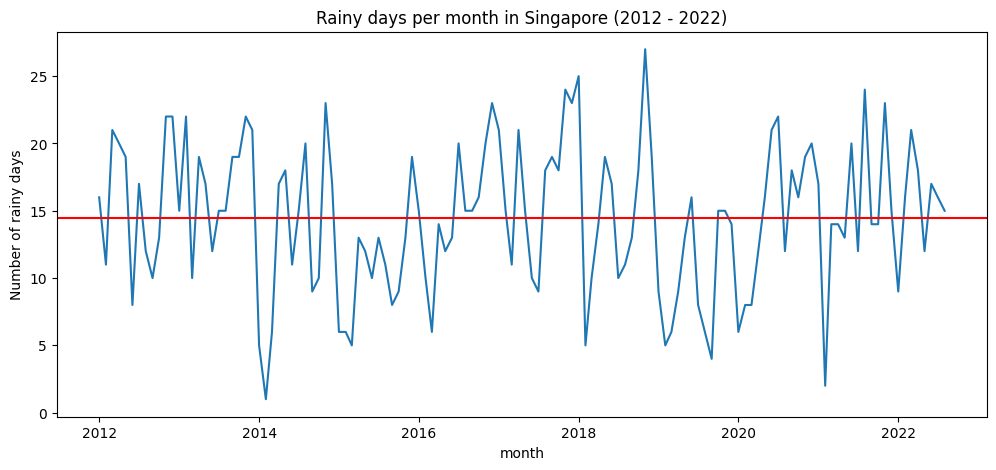

In [79]:
# display 10 years of rainy day per month information
plt.figure(figsize = (12, 5))
plt.title('Rainy days per month in Singapore (2012 - 2022)')
plt.xlabel('month')
plt.ylabel('Number of rainy days')

plt.plot(number_of_rain_df['date'], number_of_rain_df['no_of_rainy_days'])
plt.axhline(number_of_rain_df['no_of_rainy_days'].mean(), color="red")

In [85]:
# clean and prep `total_rain_df` data
total_rain_df = total_rain_df.dropna()
total_rain_df['date'] = pd.to_datetime(total_rain_df['month'].map(str) + '-01')
total_rain_df = total_rain_df.loc[(total_rain_df['date'] >= '2012-01-01')]

162.2265625

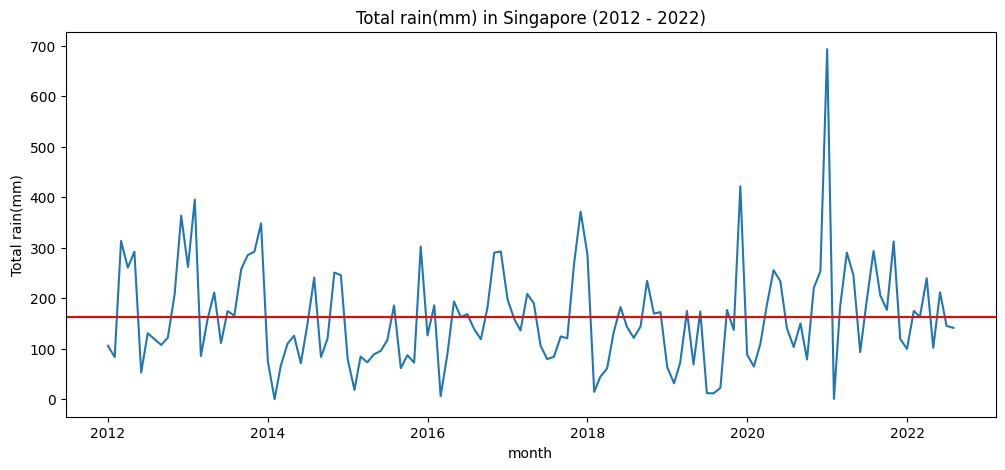

In [159]:
# display 10 years of total rain per month information
plt.figure(figsize = (12, 5))
plt.title('Total rain(mm) in Singapore (2012 - 2022)')
plt.xlabel('month')
plt.ylabel('Total rain(mm)')

plt.plot(total_rain_df['date'], total_rain_df['total_rainfall'])
plt.axhline(total_rain_df['total_rainfall'].mean(), color="red")
total_rain_df['total_rainfall'].mean()

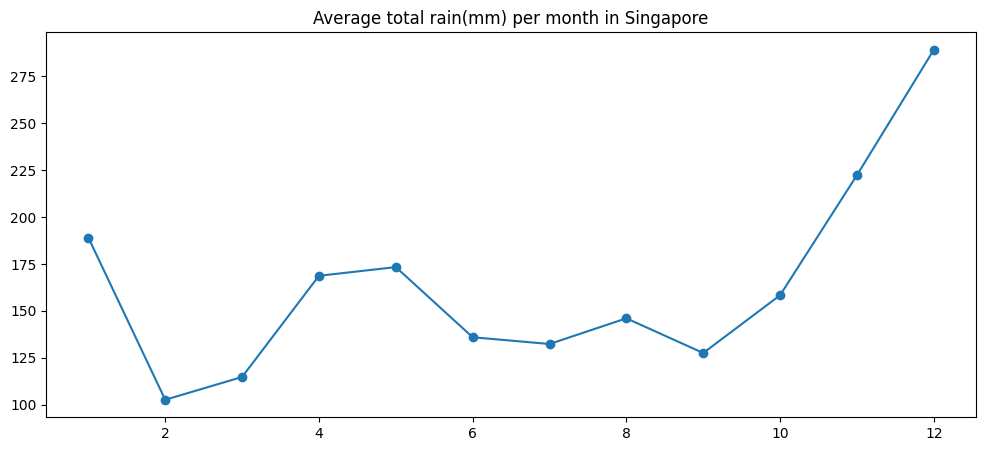

In [179]:
total_rain_df['month'] = total_rain_df['date'].dt.month
total_rain = total_rain_df.groupby('month').mean()
total_rain = total_rain.reset_index()

plt.figure(figsize = (12, 5))
plt.title('Average total rain(mm) per month in Singapore')

plt.plot(total_rain['month'], total_rain['total_rainfall'], marker='o')


# PISA score for Singapore
Singapore in the top tier list for education 

we gather data from PISA and analysing it with global mean (OECD AVG) for benchmark
with another relate sources

references
- [reading performance](https://data.oecd.org/pisa/reading-performance-pisa.htm)
- [mathematics performance](https://data.oecd.org/pisa/mathematics-performance-pisa.htm)
- [science performance](https://data.oecd.org/pisa/science-performance-pisa.htm)

In [146]:
# import PISA data
math_pisa = pd.read_csv('data/mathematics-performance-pisa.csv')
reading_pisa = pd.read_csv('data/reading-performance-pisa.csv')
science_pisa = pd.read_csv('data/science-performance-pisa.csv')

In [147]:
# clean and prep `math_pisa` data
math_pisa.drop('Flag Codes', axis='columns', inplace=True)
math_pisa['TIME'] = pd.to_datetime(math_pisa['TIME'].map(str))

reading_pisa.drop('Flag Codes', axis='columns', inplace=True)
reading_pisa['TIME'] = pd.to_datetime(math_pisa['TIME'].map(str))

science_pisa.drop('Flag Codes', axis='columns', inplace=True)
science_pisa['TIME'] = pd.to_datetime(math_pisa['TIME'].map(str))


<BarContainer object of 12 artists>

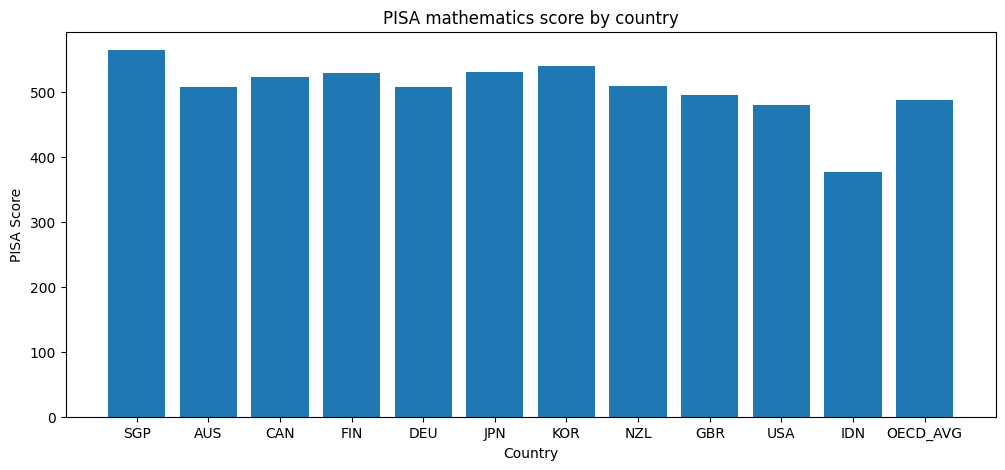

In [242]:
# Display selected 10 countries with  PISA mathemathics score
filter_country = ['SGP', 'AUS', 'CAN', 'FIN', 'DEU', 'JPN', 'KOR', 'NZL', 'GBR', 'USA', 'IDN', 'OECD_AVG']

math_selected_country = math_pisa.groupby('LOCATION')['Value'].mean()
math_selected_country = math_selected_country.to_frame().T.assign(OECD_AVG=math_pisa['Value'].mean()).squeeze()

plt.figure(figsize = (12, 5))
plt.title('PISA mathematics score by country')
plt.xlabel('Country')
plt.ylabel('PISA Score')

plt.bar(filter_country, math_selected_country.loc[filter_country].values)


<BarContainer object of 12 artists>

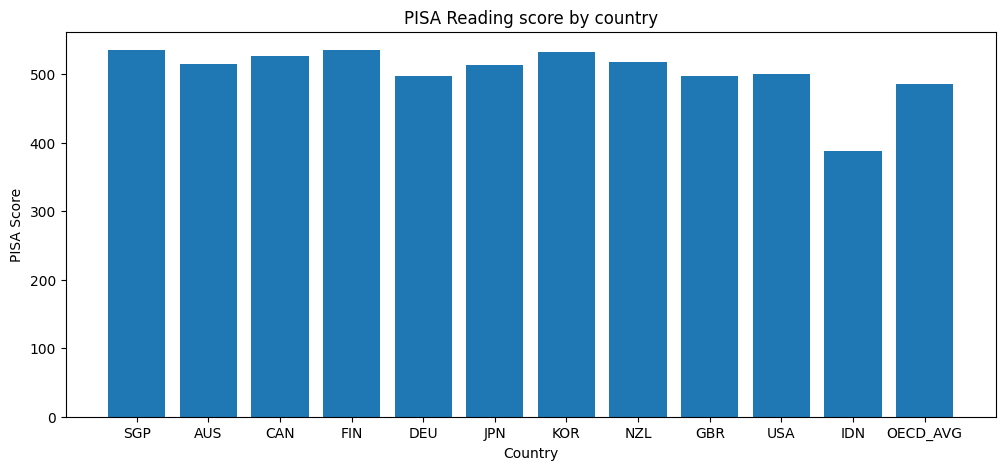

In [241]:
# Display selected 10 countries with  PISA reading score
reading_selected_country = reading_pisa.groupby('LOCATION')['Value'].mean()
reading_selected_country = reading_selected_country.to_frame().T.assign(OECD_AVG=reading_pisa['Value'].mean()).squeeze()

plt.figure(figsize = (12, 5))
plt.title('PISA Reading score by country')
plt.xlabel('Country')
plt.ylabel('PISA Score')

plt.bar(filter_country, reading_selected_country.loc[filter_country].values)

<BarContainer object of 12 artists>

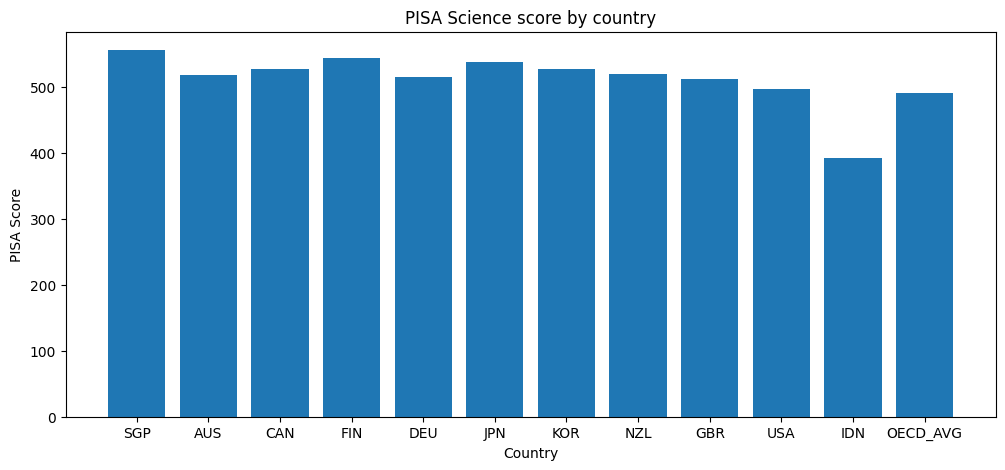

In [240]:
# Display selected 10 countries with  PISA science score

science_selected_country = science_pisa.groupby('LOCATION')['Value'].mean()
science_selected_country = science_selected_country.to_frame().T.assign(OECD_AVG=science_pisa['Value'].mean()).squeeze()

plt.figure(figsize = (12, 5))
plt.title('PISA Science score by country')
plt.xlabel('Country')
plt.ylabel('PISA Score')


plt.bar(filter_country, science_selected_country[filter_country].values)